In [16]:
import pandas as pd
import pyarrow.parquet as pq
import re
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
mount_path = "/workspaces/prediction_house_price_from_airbnb/Data"

In [20]:
pd.set_option('display.max_columns', None)

In [24]:
df = pd.read_parquet(mount_path + "/silver/listings.parquet")



In [30]:
df.describe

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance
count,2.585100e+04,2.585100e+04,2.585100e+04,25849.000000,25849.000000,0.0,25851.000000,25851.000000,25851.000000,25790.000000,24598.000000,25651.000000,25851.000000,25851.000000,25851.000000,25851.000000,25851.000000,25851.000000,25851.000000,25851.000000,25851.000000,0.0,25851.000000,25851.000000,25851.000000,25851.000000,25851.000000,25851.000000,25851.000000,18582.000000,18422.000000,18423.000000,18423.000000,18422.000000,18421.000000,18422.000000,0.0,25851.000000,25851.000000,25851.000000,25851.000000,18582.000000,25851.000000
mean,2.223583e+17,2.022123e+13,1.475255e+08,12.219931,19.349646,NaN,-22.966401,-43.250632,3.845538,1.486448,1.550167,2.384313,666.179026,4.744923,521.766353,4.427334,5.524467,634.603149,673.459673,4.660094,662.649267,NaN,14.144443,31.203977,52.653630,204.274922,18.291362,6.418243,0.414994,4.733233,4.803306,4.720623,4.881495,4.865315,4.867414,4.692942,NaN,7.218560,6.423117,0.698696,0.086496,0.906366,10.979524
std,3.273753e+17,0.000000e+00,1.534438e+08,67.771754,94.374879,NaN,0.035524,0.100137,2.058865,0.787938,0.846315,1.820946,475.061872,23.406904,558.665035,20.356137,23.539917,573.462877,565.910545,20.473431,565.183580,NaN,11.394733,21.770450,31.285253,136.131424,38.808001,10.887947,0.952365,0.607991,0.415131,0.473871,0.340922,0.365967,0.327119,0.456301,NaN,20.961919,20.926961,1.734887,0.708517,1.039525,8.528103
min,1.787800e+04,2.022123e+13,3.607000e+03,1.000000,1.000000,NaN,-23.072840,-43.705910,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,0.038052
25%,1.589017e+07,2.022123e+13,1.925865e+07,1.000000,1.000000,NaN,-22.984460,-43.310265,2.000000,1.000000,1.000000,1.000000,300.000000,2.000000,40.000000,1.000000,2.000000,89.000000,90.000000,2.000000,90.000000,NaN,2.000000,9.000000,27.000000,74.000000,0.000000,0.000000,0.000000,4.710000,4.780000,4.640000,4.890000,4.880000,4.860000,4.600000,NaN,1.000000,1.000000,0.000000,0.000000,0.190000,6.401726
50%,4.417584e+07,2.022123e+13,8.034935e+07,2.000000,2.000000,NaN,-22.971870,-43.195120,4.000000,1.000000,1.000000,2.000000,547.000000,2.000000,365.000000,2.000000,3.000000,365.000000,1125.000000,2.200000,1079.800000,NaN,14.000000,33.000000,59.000000,210.000000,4.000000,2.000000,0.000000,4.910000,4.940000,4.880000,5.000000,5.000000,5.000000,4.810000,NaN,1.000000,1.000000,0.000000,0.000000,0.550000,8.054256
75%,6.329181e+17,2.022123e+13,2.462317e+08,4.000000,6.000000,NaN,-22.953565,-43.185800,5.000000,2.000000,2.000000,3.000000,909.000000,4.000000,1125.000000,3.000000,5.000000,1125.000000,1125.000000,4.000000,1125.000000,NaN,26.000000,53.000000,82.000000,348.000000,17.000000,8.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,2.000000,1.000000,0.000000,1.250000,15.769645
max,7.915838e+17,2.022123e+13,4.930385e+08,1821.000000,1849.000000,NaN,-22.749690,-43.104400,16.000000,20.000000,30.000000,50.000000,2200.000000,1125.000000,47036.000000,1125.000000,1125.00

In [25]:
listings.hea

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance
0,783493769216852616,https://www.airbnb.com/rooms/783493769216852616,20221229002515,2022-12-29,city scrape,"Leme, Brasil",Apartamento aconchegante próximo à praia do Le...,None,https://a0.muscache.com/pictures/fe1f4b1b-a300...,491704706,https://www.airbnb.com/users/show/491704706,Felipe,2022-12-16,None,None,within a few hours,100%,67%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Leme,2.0,2.0,"['email', 'phone']",f,f,None,Leme,NaN,-22.96421,-43.171600,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Wifi"", ""Dedicated workspace"", ""Kitchen"", ""Fi...",720.0,1,365,1,1,365,365,1.0,365.0,NaN,t,27,57,87,362,2022-12-29,0,0,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN,6.711760
1,703973293620197060,https://www.airbnb.com/rooms/703973293620197060,20221229002515,2022-12-29,city scrape,Suíte com entrada independente em casarão 1,"Casa ampla, em excelente localização, situada ...",None,https://a0.muscache.com/pictures/miso/Hosting-...,20362236,https://www.airbnb.com/users/show/20362236,Júlio Cesar,2014-08-21,"Rio de Janeiro, Brazil",None,within an hour,70%,100%,f,https://a0.muscache.com/im/users/20362236/prof...,https://a0.muscache.com/im/users/20362236/prof...,Botafogo,4.0,5.0,"['email', 'phone']",t,t,None,Botafogo,NaN,-22.95792,-43.182226,Private room in bed and breakfast,Private room,2,1.0,1 private bath,1.0,1.0,"[""Wifi"", ""Lock on bedroom door"", ""TV"", ""Coffee...",599.0,4,365,4,4,365,365,4.0,365.0,NaN,t,28,58,88,363,2022-12-29,1,1,0,2022-09-06,2022-09-06,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,t,4,0,4,0,0.26,5.701366


In [38]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
df = df[(df['price'] >= q1 - 1.5*iqr) & (df['price'] <= q3 + 1.5*iqr)]

array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

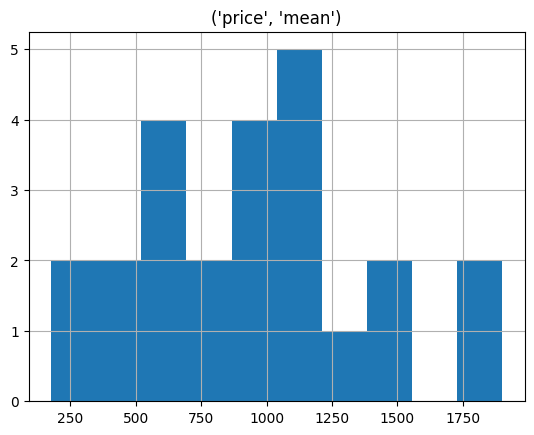

In [37]:
df.groupby('bathrooms').agg({'price':['mean']}).hist()

array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

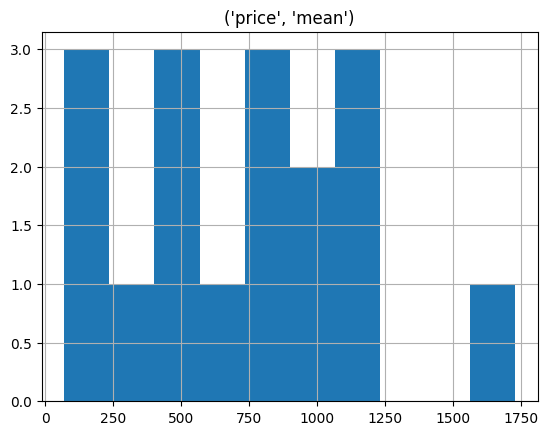

In [39]:
df.groupby('bedrooms').agg({'price':['mean']}).hist()

<Axes: xlabel='distance'>

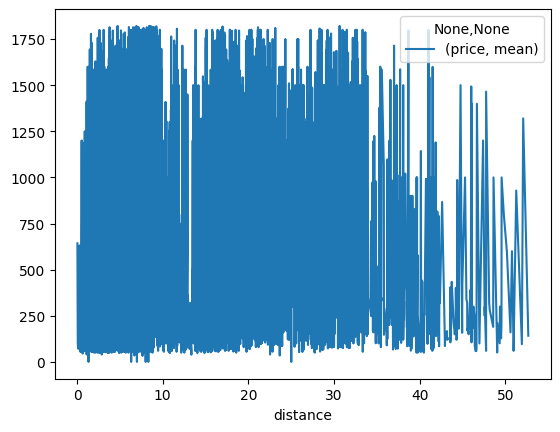

In [47]:
df.groupby('distance').agg({'price':['mean']}).plot()

<Axes: xlabel='price', ylabel='distance'>

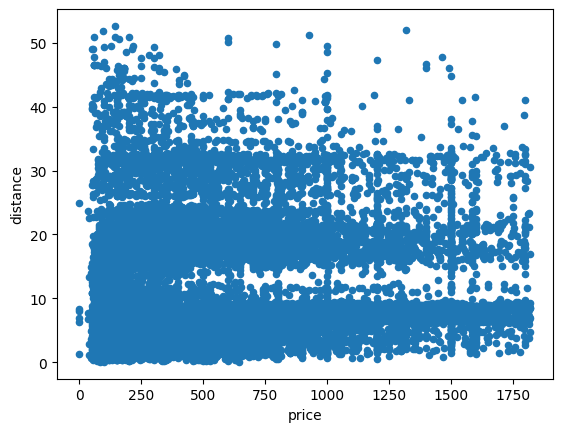

In [45]:
df.plot(kind='scatter', x='price', y='distance')